In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# import plotly.express as px 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_score

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (accuracy_score, 
                            confusion_matrix, 
                            classification_report,
                            f1_score,
                            plot_confusion_matrix,
                            precision_recall_curve,
                            precision_score,
                            recall_score)

In [2]:
pwd

'/Users/emilynaftalin/Data_Science/General Assembly/dsi/projects/Mass-Protests/users'

In [17]:
# mass = pd.read_csv('../data/mass_mobile.csv')
# mass.head(2)

In [18]:
# mass.drop(columns=['Unnamed: 0'], inplace=True)

In [19]:
mass_no_country = pd.read_csv('../data/03_mass_no_country.csv')

In [20]:
mass_no_country.head(2)

,id,country,ccode,region,protestnumber,protesterviolence,location,protesteridentity,sources,notes,...,end_date,target,notes_clean,neg,neu,pos,compound,protest_duration,violent_response,violent_count
0,201990001,Canada,20,North America,1,0.0,national,unspecified,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...,...,1990-01-15,"[0, 0, 0, 0, 1, 0, 0]",canada s railway passenger system was finally ...,0.087,0.913,0.0,-0.8176,1,0,0
1,201990002,Canada,20,North America,2,0.0,"Montreal, Quebec",unspecified,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...,...,1990-06-25,"[0, 0, 0, 0, 1, 0, 0]",protestors were only identified as young peopl...,0.000,1.000,0.0,0.0000,1,0,0


In [21]:
def evaluate_model(y_true, y_preds):
    
    f1 = f1_score(y_true, y_preds)
    
    precision = precision_score(y_true, y_preds)
    
    recall = recall_score(y_true, y_preds)

    # add accuracy

    return f1, precision, recall

In [22]:
def response_prediction_columns(model, df, features):
    
    ss = StandardScaler()
    
    X = features
    X_sc = ss.fit_transform(X)
    
    predicted_column = model.predict(X_sc)
    probability_column = model.predict_proba(X_sc)[:,1]
    
    return predicted_column, probability_column

In [23]:
def state_response_predictor(df, features, target, model):
    
    X = features 
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

    ss = StandardScaler()

    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)
    
    model.fit(X_train_sc, y_train)
    
    y_preds_train = model.predict(X_train_sc)
    y_preds_test = model.predict(X_test_sc)
    
    f1_score_train, precision_train, recall_train = evaluate_model(y_train, y_preds_train)
    f1_score_test, precision_test, recall_test = evaluate_model(y_test, y_preds_test)
    
    print(f'{target}- F1_score for {model} model, train set: {f1_score_train}')
    print(f'{target}- F1_score for {model} model, test set: {f1_score_test}')
    print(f'{target}- Precision for {model} model, train set: {precision_train}')
    print(f'{target}- Precision for {model} model, test set: {precision_test}')
    print(f'{target}- Recall for {model} model, train set: {recall_train}')
    print(f'{target}- Recall for {model} model, teset set: {recall_test}')
    
    predicted_column, probability_column = response_prediction_columns(model, df, features)
    
#     print(model)

#     # confusion_matrix 
#     cf_matrix = plot_confusion_matrix(model, X_test_sc, y_test, cmap='Blues', display_labels=[f'Not {target}, f'{target}'])
                                                                                              
    # confusion_matrix 
    print(confusion_matrix(y_test, y_preds_test))
    cf_matrix = plot_confusion_matrix(model, X_test_sc, y_test, cmap='Blues', display_labels=[f'Not {target}', f'{target}'])

    return predicted_column, probability_column, f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test, cf_matrix  

In [24]:
# mass_no_country = pd.read_pickle('../data/mass_no_country.pickle')

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


arrests- F1_score for LogisticRegression(C=0.01, penalty='l1', solver='liblinear') model, train set: 0.0
arrests- F1_score for LogisticRegression(C=0.01, penalty='l1', solver='liblinear') model, test set: 0.0
arrests- Precision for LogisticRegression(C=0.01, penalty='l1', solver='liblinear') model, train set: 0.0
arrests- Precision for LogisticRegression(C=0.01, penalty='l1', solver='liblinear') model, test set: 0.0
arrests- Recall for LogisticRegression(C=0.01, penalty='l1', solver='liblinear') model, train set: 0.0
arrests- Recall for LogisticRegression(C=0.01, penalty='l1', solver='liblinear') model, teset set: 0.0
[[2616    0]
 [ 420    0]]


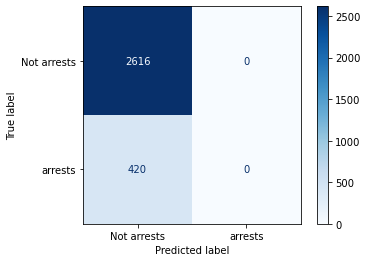

In [25]:
# DELETE LATER 

features_arr = mass_no_country.drop(columns=['id', 'country', 'ccode', 'region', 'location','protesteridentity', 'sources',
           'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos', 'compound',
           'end_date', 'target', 'arrests', 'accomodation', 'beatings', 'protest_duration', 'pop_male', 'pop_female', 'pop_total',
           'crowddispersal', 'ignore', 'killings', 'shootings', 'violent_response', 'violent_count'])

lr_arr = LogisticRegression(C=0.01, max_iter=100, penalty='l1', solver='liblinear')

mass_no_country['arrests_predicted'], mass_no_country['arrests_probability'], \
f1_score_train_arrests, f1_score_test_arrests, precision_train_arrests, precision_test_arrests, recall_train_arrests, recall_test_arrests, cf_matrix_arrests = \
state_response_predictor(mass_no_country, features_arr, 'arrests', lr_arr)

In [26]:
mass_no_country['arrests'].value_counts()

0    13036
1     2143
Name: arrests, dtype: int64

In [27]:
mass_no_country.shape

(15179, 73)

Creating two new columns that consolidate the three violent state responses -- `beatings, shootings, killings`.
+ `violent_response`: indicates whether or not a violdnt state response was used. (0 for no, 1 for yes)
+ `violent_count`: indicates number (0,1,2,3) of violent ressponses that were recorded. (I anticipate this will be used just to judge collinearity/dependence.)

_NB: Not yet dropping the original three columns._

In [28]:
# mass['violent_response'] = 0 
# mass.loc[mass['beatings'] == 1, 'violent_response'] = 1
# mass.loc[mass['shootings'] == 1, 'violent_response'] = 1
# mass.loc[mass['killings'] == 1, 'violent_response'] = 1

In [ ]:
# mass_no_country['violent_response'] = 0 
# mass_no_country.loc[mass_no_country['beatings'] == 1, 'violent_response'] = 1
# mass_no_country.loc[mass_no_country['shootings'] == 1, 'violent_response'] = 1
# mass_no_country.loc[mass_no_country['killings'] == 1, 'violent_response'] = 1

In [29]:
# mass['violent_count'] = mass['beatings'] + mass['shootings'] + mass['killings']

In [30]:
# checking whether the new column looks good 
# mass[['beatings', 'shootings','killings', 'violent_response', 'violent_count']]

In [31]:
# mass[ mass['violent_count'] > 1][['beatings', 'shootings','killings', 'violent_response']].count()

_Saving and pickling `mass` DataFrame that now has `violent_response` and `violent_count` columns. 

In [32]:
# mass.to_csv('../data/03_mass_violent_response.csv', index=False)

In [33]:
# mass.to_pickle('../data/03_mass_violent_response.pickle')

In [34]:
# features = mass.drop(columns=['country', 'ccode', 'region', 'location','protesteridentity', 'sources',
#            'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos',
#            'end_date', 'target', 'arrests', 'accomodation', 'beatings', 'crowddispersal', 'ignore', 'killings', 'shootings', 
#             'violent_response', 'violent_count'])

# LogisticRegression_1 = LogisticRegression(solver='lbfgs', max_iter=1000)

In [21]:
# (mass.drop(columns=['country', 'ccode', 'region', 'location','protesteridentity', 'sources',
#            'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos',
#            'end_date', 'target', 'arrests', 'accomodation', 'beatings',
#            'crowddispersal', 'ignore', 'killings', 'shootings'])).columns

**Adding `predicted` and `probability` columns for each each response to the `mass` DF using `state_response_predictor` function.** 

Responses: `'arrests','accomodation','beatings','crowddispersal','ignore','killings','shootings'`

In [35]:
# mass['arrests_predicted'], mass['arrests_probability'], \
# f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test, cf_matrix = \
# state_response_predictor(mass, features, 'arrests', LogisticRegression_1)

# mass['accomodation_predicted'], mass['accomodation_probability'], \
# f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test, cf_matrix = \
# state_response_predictor(mass, features, 'accomodation', LogisticRegression_1)

# mass['beatings_predicted'], mass['beatings_probability'], f1_score_train, \
# f1_score_test, precision_train, precision_test, recall_train, recall_test, cf_matrix = \
# state_response_predictor(mass, features, 'beatings', LogisticRegression_1)

# mass['crowddispersal_predicted'], mass['crowddispersal_probability'], \
# f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test, cf_matrix = \
# state_response_predictor(mass, features, 'crowddispersal', LogisticRegression_1)

# mass['ignore_predicted'], mass['ignore_probability'], \
# f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test, cf_matrix = \
# state_response_predictor(mass, features, 'ignore', LogisticRegression_1)

# mass['killings_predicted'], mass['killings_probability'], \
# f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test, cf_matrix = \
# state_response_predictor(mass, features, 'killings', LogisticRegression_1)

# mass['shootings_predicted'], mass['shootings_probability'], \
# f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test, cf_matrix = \
# state_response_predictor(mass, features, 'shootings', LogisticRegression_1)

# # looking at where accomodation is '1' and it was also correctly predicted 

# mass[ (mass['accomodation'] == mass['accomodation_predicted']) & mass['accomodation']==1 ][['accomodation', 'accomodation_predicted', 'accomodation_probability']]

In [26]:
# predictions_df = mass[['id','arrests', 'arrests_predicted', 'arrests_probability', 'accomodation', 'accomodation_predicted', 'accomodation_probability', 
#       'beatings', 'beatings_predicted', 'beatings_probability', 'crowddispersal', 'crowddispersal_predicted', 'crowddispersal_probability', 
#       'ignore', 'ignore_predicted', 'ignore_probability', 'killings', 'killings_predicted', 'killings_probability',
#       'killings', 'killings_predicted', 'killings_probability']].copy()

In [247]:
# predictions_df.head()

In [207]:
# predictions_df.to_csv('../data/04_predictions_only.csv', index=False)

Adding `predicted` and `probability` columns for a violent response of any type (beatings/shootings/killigs). 

In [36]:
# mass['violence_predicted'], mass['violence_probability'], \
# f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test, cf_matrix = \
# state_response_predictor(mass, features, 'violent_response', LogisticRegression_1)

{'target': ['arrests', 'accomodation', 'beatings', 'crowddispersal', 'ignore', 'killings', 'shootings', 'violent_response'], 'majority_class': [0, 0, 0, 0, 1, 0, 0, 0], 'majority_percent': [0.8588181039594176, 0.8997957704723631, 0.9472956057711311, 0.6865406153238026, 0.5434481849924238, 0.9457144739442651, 0.9386652612161539, 0.8753541076487252], 'f1_score_train': [0.24430264357338197, 0.09939759036144577, 0.17173051519154559, 0.6446232626188734, 0.7954094644375178, 0.24191616766467064, 0.24093816631130063, 0.39802336028751123], 'f1_score_test': [0.2722117202268431, 0.06984126984126984, 0.15568862275449102, 0.624173180998196, 0.7837535014005603, 0.1958762886597938, 0.2, 0.35976789168278533], 'precision_train': [0.5690021231422505, 0.6470588235294118, 0.65, 0.7299536116633533, 0.745848279527036, 0.6121212121212121, 0.5947368421052631, 0.6429608127721336], 'precision_test': [0.6605504587155964, 0.55, 0.5416666666666666, 0.7188365650969529, 0.7324607329842932, 0.475, 0.48936170212765956

,target,majority_class,majority_percent,f1_score_train,f1_score_test,precision_train,precision_test,recall_train,recall_test
0,arrests,0,0.8588,0.2443,0.2722,0.5690,0.6606,0.1555,0.1714
1,accomodation,0,0.8998,0.0994,0.0698,0.6471,0.5500,0.0538,0.0373
2,beatings,0,0.9473,0.1717,0.1557,0.6500,0.5417,0.0989,0.0909
3,crowddispersal,0,0.6865,0.6446,0.6242,0.7300,0.7188,0.5772,0.5515
4,ignore,1,0.5434,0.7954,0.7838,0.7458,0.7325,0.8520,0.8428
5,killings,0,0.9457,0.2419,0.1959,0.6121,0.4750,0.1507,0.1234
6,shootings,0,0.9387,0.2409,0.2000,0.5947,0.4894,0.1511,0.1257
7,violent_response,0,0.8754,0.3980,0.3598,0.6430,0.5741,0.2882,0.2620


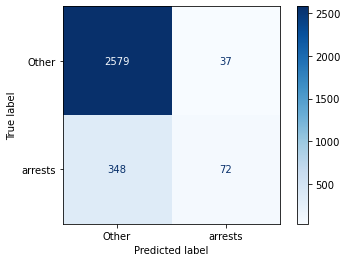

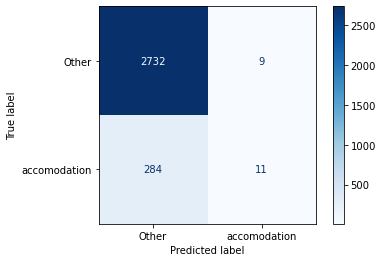

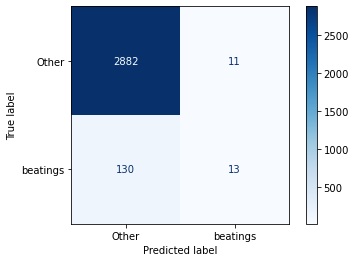

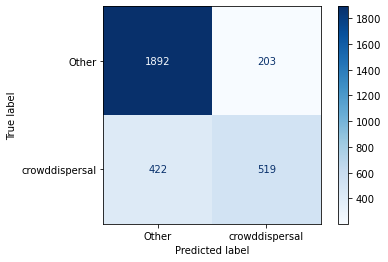

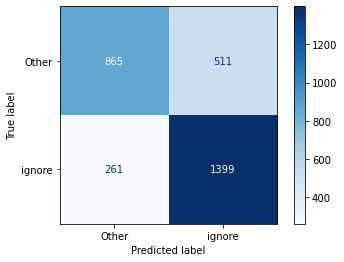

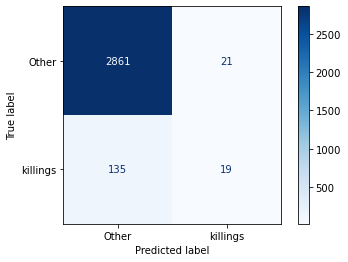

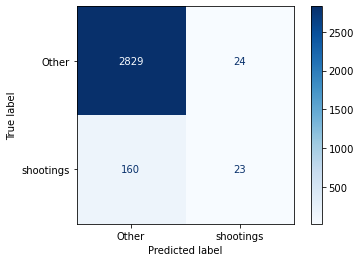

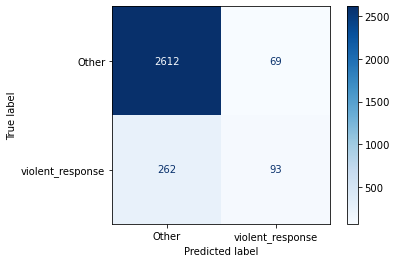

In [38]:
model_performance_dict = {
    'target':[],
    'majority_class':[],
    'majority_percent':[],
    'f1_score_train':[],
    'f1_score_test':[],
    'precision_train':[],
    'precision_test':[],
    'recall_train':[],
    'recall_test':[] 
}

 
targets = ['arrests','accomodation','beatings','crowddispersal','ignore','killings','shootings', 'violent_response']    
    
for target in targets:
    
    predicted_column, probability_column, \
    f1_score_train, f1_score_test, precision_train, precision_test, \
    recall_train, recall_test, cf_matrix = state_response_predictor(mass,
                                                                    features, 
                                                                    target, 
                                                                    LogisticRegression_1)
    
    model_performance_dict['target'].append(target)
    model_performance_dict['majority_class'].append(mass[target].value_counts(normalize=True).idxmax())
    model_performance_dict['majority_percent'].append(max(mass[target].value_counts(normalize=True)))
    model_performance_dict['f1_score_train'].append(f1_score_train)
    model_performance_dict['f1_score_test'].append(f1_score_test)
    model_performance_dict['precision_train'].append(precision_train)
    model_performance_dict['precision_test'].append(precision_test)
    model_performance_dict['recall_train'].append(recall_train)
    model_performance_dict['recall_test'].append(recall_test)
    
print(model_performance_dict)
    
model_performance_df = pd.DataFrame(model_performance_dict)
model_performance_df.round(4)

In [41]:
mass['arrests'].value_counts(normalize=True)

0    0.858818
1    0.141182
Name: arrests, dtype: float64

In [42]:
mass['arrests'].value_counts(normalize=True).idxmax()

0

In [43]:
max(mass['arrests'].value_counts(normalize=True))

0.8588181039594176

In [44]:
# mass.info(verbose=True)

_Re-running `state_response_predictor` function on dataframe without dummified country columns._ 

In [45]:
mass_no_country = mass.copy()

In [46]:
# mass_no_country.info(verbose=1)

Cell below drops the country columns from `mass_no_country` (created in the above cell) but I minimized it for length/scrolling reasons. 

In [48]:
mass_no_country = mass_no_country.drop(columns=[ 'country_Afghanistan',
 'country_Albania',
 'country_Algeria',
 'country_Angola',
 'country_Argentina',
 'country_Armenia',
 'country_Austria',
 'country_Azerbaijan',
 'country_Bahrain',
 'country_Bangladesh',
 'country_Belarus',
 'country_Belgium',
 'country_Benin',
 'country_Bolivia',
 'country_Bosnia',
 'country_Botswana',
 'country_Brazil',
 'country_Bulgaria',
 'country_Burkina Faso',
 'country_Burundi',
 'country_Cambodia',
 'country_Cameroon',
 'country_Canada',
 'country_Cape Verde',
 'country_Central African Republic',
 'country_Chad',
 'country_Chile',
 'country_China',
 'country_Colombia',
 'country_Comoros',
 'country_Congo Brazzaville',
 'country_Congo Kinshasa',
 'country_Costa Rica',
 'country_Croatia',
 'country_Cuba',
 'country_Cyprus',
 'country_Czech Republic',
 'country_Czechoslovakia',
 'country_Denmark',
 'country_Djibouti',
 'country_Dominican Republic',
 'country_Ecuador',
 'country_Egypt',
 'country_El Salvador',
 'country_Equatorial Guinea',
 'country_Eritrea',
 'country_Estonia',
 'country_Ethiopia',
 'country_Finland',
 'country_France',
 'country_Gabon',
 'country_Gambia',
 'country_Georgia',
 'country_Germany',
 'country_Germany East',
 'country_Germany West',
 'country_Ghana',
 'country_Greece',
 'country_Guatemala',
 'country_Guinea',
 'country_Guinea-Bissau',
 'country_Guyana',
 'country_Haiti',
 'country_Honduras',
 'country_Hungary',
 'country_India',
 'country_Indonesia',
 'country_Iran',
 'country_Iraq',
 'country_Ireland',
 'country_Italy',
 'country_Ivory Coast',
 'country_Jamaica',
 'country_Japan',
 'country_Jordan',
 'country_Kazakhstan',
 'country_Kenya',
 'country_Kosovo',
 'country_Kuwait',
 'country_Kyrgyzstan',
 'country_Laos',
 'country_Latvia',
 'country_Lebanon',
 'country_Lesotho',
 'country_Liberia',
 'country_Libya',
 'country_Lithuania',
 'country_Luxembourg',
 'country_Macedonia',
 'country_Madagascar',
 'country_Malawi',
 'country_Malaysia',
 'country_Mali',
 'country_Mauritania',
 'country_Mauritius',
 'country_Mexico',
 'country_Moldova',
 'country_Mongolia',
 'country_Montenegro',
 'country_Morocco',
 'country_Mozambique',
 'country_Myanmar',
 'country_Namibia',
 'country_Nepal',
 'country_Netherlands',
 'country_Nicaragua',
 'country_Niger',
 'country_Nigeria',
 'country_North Korea',
 'country_Norway',
 'country_Oman',
 'country_Pakistan',
 'country_Panama',
 'country_Papua New Guinea',
 'country_Paraguay',
 'country_Peru',
 'country_Philippines',
 'country_Poland',
 'country_Portugal',
 'country_Qatar',
 'country_Romania',
 'country_Russia',
 'country_Rwanda',
 'country_Saudi Arabia',
 'country_Senegal',
 'country_Serbia',
 'country_Serbia and Montenegro',
 'country_Sierra Leone',
 'country_Singapore',
 'country_Slovak Republic',
 'country_Slovenia',
 'country_Somalia',
 'country_South Africa',
 'country_South Korea',
 'country_South Sudan',
 'country_Spain',
 'country_Sri Lanka',
 'country_Sudan',
 'country_Suriname',
 'country_Swaziland',
 'country_Sweden',
 'country_Switzerland',
 'country_Syria',
 'country_Taiwan',
 'country_Tajikistan',
 'country_Tanzania',
 'country_Thailand',
 'country_Timor Leste',
 'country_Togo',
 'country_Tunisia',
 'country_Turkey',
 'country_Turkmenistan',
 'country_USSR',
 'country_Uganda',
 'country_Ukraine',
 'country_United Arab Emirate',
 'country_United Kingdom',
 'country_Uruguay',
 'country_Uzbekistan',
 'country_Venezuela',
 'country_Vietnam',
 'country_Yemen',
 'country_Yugoslavia',
 'country_Zambia',
 'country_Zimbabwe' ])

KeyError: "['country_Afghanistan' 'country_Albania' 'country_Algeria'\n 'country_Angola' 'country_Argentina' 'country_Armenia' 'country_Austria'\n 'country_Azerbaijan' 'country_Bahrain' 'country_Bangladesh'\n 'country_Belarus' 'country_Belgium' 'country_Benin' 'country_Bolivia'\n 'country_Bosnia' 'country_Botswana' 'country_Brazil' 'country_Bulgaria'\n 'country_Burkina Faso' 'country_Burundi' 'country_Cambodia'\n 'country_Cameroon' 'country_Canada' 'country_Cape Verde'\n 'country_Central African Republic' 'country_Chad' 'country_Chile'\n 'country_China' 'country_Colombia' 'country_Comoros'\n 'country_Congo Brazzaville' 'country_Congo Kinshasa' 'country_Costa Rica'\n 'country_Croatia' 'country_Cuba' 'country_Cyprus'\n 'country_Czech Republic' 'country_Czechoslovakia' 'country_Denmark'\n 'country_Djibouti' 'country_Dominican Republic' 'country_Ecuador'\n 'country_Egypt' 'country_El Salvador' 'country_Equatorial Guinea'\n 'country_Eritrea' 'country_Estonia' 'country_Ethiopia' 'country_Finland'\n 'country_France' 'country_Gabon' 'country_Gambia' 'country_Georgia'\n 'country_Germany' 'country_Germany East' 'country_Germany West'\n 'country_Ghana' 'country_Greece' 'country_Guatemala' 'country_Guinea'\n 'country_Guinea-Bissau' 'country_Guyana' 'country_Haiti'\n 'country_Honduras' 'country_Hungary' 'country_India' 'country_Indonesia'\n 'country_Iran' 'country_Iraq' 'country_Ireland' 'country_Italy'\n 'country_Ivory Coast' 'country_Jamaica' 'country_Japan' 'country_Jordan'\n 'country_Kazakhstan' 'country_Kenya' 'country_Kosovo' 'country_Kuwait'\n 'country_Kyrgyzstan' 'country_Laos' 'country_Latvia' 'country_Lebanon'\n 'country_Lesotho' 'country_Liberia' 'country_Libya' 'country_Lithuania'\n 'country_Luxembourg' 'country_Macedonia' 'country_Madagascar'\n 'country_Malawi' 'country_Malaysia' 'country_Mali' 'country_Mauritania'\n 'country_Mauritius' 'country_Mexico' 'country_Moldova' 'country_Mongolia'\n 'country_Montenegro' 'country_Morocco' 'country_Mozambique'\n 'country_Myanmar' 'country_Namibia' 'country_Nepal' 'country_Netherlands'\n 'country_Nicaragua' 'country_Niger' 'country_Nigeria'\n 'country_North Korea' 'country_Norway' 'country_Oman' 'country_Pakistan'\n 'country_Panama' 'country_Papua New Guinea' 'country_Paraguay'\n 'country_Peru' 'country_Philippines' 'country_Poland' 'country_Portugal'\n 'country_Qatar' 'country_Romania' 'country_Russia' 'country_Rwanda'\n 'country_Saudi Arabia' 'country_Senegal' 'country_Serbia'\n 'country_Serbia and Montenegro' 'country_Sierra Leone'\n 'country_Singapore' 'country_Slovak Republic' 'country_Slovenia'\n 'country_Somalia' 'country_South Africa' 'country_South Korea'\n 'country_South Sudan' 'country_Spain' 'country_Sri Lanka' 'country_Sudan'\n 'country_Suriname' 'country_Swaziland' 'country_Sweden'\n 'country_Switzerland' 'country_Syria' 'country_Taiwan'\n 'country_Tajikistan' 'country_Tanzania' 'country_Thailand'\n 'country_Timor Leste' 'country_Togo' 'country_Tunisia' 'country_Turkey'\n 'country_Turkmenistan' 'country_USSR' 'country_Uganda' 'country_Ukraine'\n 'country_United Arab Emirate' 'country_United Kingdom' 'country_Uruguay'\n 'country_Uzbekistan' 'country_Venezuela' 'country_Vietnam'\n 'country_Yemen' 'country_Yugoslavia' 'country_Zambia' 'country_Zimbabwe'] not found in axis"

In [234]:
# mass_no_country.info()

In [235]:
features = mass_no_country.drop(columns=['country', 'ccode', 'region', 'location','protesteridentity', 'sources',
           'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos',
           'end_date', 'target', 'arrests', 'accomodation', 'beatings', 'crowddispersal', 'ignore', 'killings', 'shootings', 
            'violent_response', 'violent_count'])

LogisticRegression_1 = LogisticRegression(solver='lbfgs', max_iter=1000)

In [236]:
# (mass.drop(columns=['country', 'ccode', 'region', 'location','protesteridentity', 'sources',
#            'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos',
#            'end_date', 'target', 'arrests', 'accomodation', 'beatings',
#            'crowddispersal', 'ignore', 'killings', 'shootings'])).columns

_Adding `predicted` and `probability` columns to the `mass_no_country` DataFrame. 

In [37]:
features_arr = mass_no_country.drop(columns=['id', 'country', 'ccode', 'region', 'location','protesteridentity', 'sources',
           'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos', 'compound',
           'end_date', 'target', 'arrests', 'accomodation', 'beatings', 'protest_duration', 'pop_male', 'pop_female', 'pop_total',
           'crowddispersal', 'ignore', 'killings', 'shootings', 'violent_response', 'violent_count'])

lr_arr = LogisticRegression(C=0.01, max_iter=100, penalty='l1', solver='liblinear')

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


arrests- F1_score for LogisticRegression(C=0.01, penalty='l1', solver='liblinear') model, train set: 0.0
arrests- F1_score for LogisticRegression(C=0.01, penalty='l1', solver='liblinear') model, test set: 0.0
arrests- Precision for LogisticRegression(C=0.01, penalty='l1', solver='liblinear') model, train set: 0.0
arrests- Precision for LogisticRegression(C=0.01, penalty='l1', solver='liblinear') model, test set: 0.0
arrests- Recall for LogisticRegression(C=0.01, penalty='l1', solver='liblinear') model, train set: 0.0
arrests- Recall for LogisticRegression(C=0.01, penalty='l1', solver='liblinear') model, teset set: 0.0
[[2616    0]
 [ 420    0]]


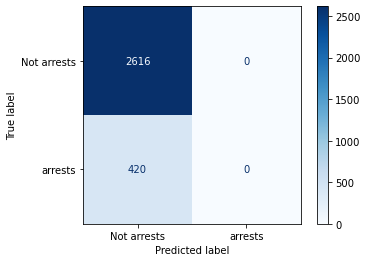

In [38]:
mass_no_country['arrests_predicted'], mass_no_country['arrests_probability'], \
f1_score_train_arrests, f1_score_test_arrests, precision_train_arrests, precision_test_arrests, recall_train_arrests, recall_test_arrests, cf_matrix_arrests = \
state_response_predictor(mass_no_country, features_arr, 'arrests', lr_arr)

In [79]:
f1_score_train_arrests

0.2823834196891191

In [78]:
f1_score_test_arrests

0.3012704174228675

In [238]:
mass_no_country['accomodation_predicted'], mass_no_country['accomodation_probability'], \
f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test = \
state_response_predictor(mass_no_country, features, 'accomodation', LogisticRegression_1)

In [239]:
mass_no_country['beatings_predicted'], mass_no_country['beatings_probability'], f1_score_train, \
f1_score_test, precision_train, precision_test, recall_train, recall_test = \
state_response_predictor(mass_no_country, features, 'beatings', LogisticRegression_1)

In [240]:
mass_no_country['crowddispersal_predicted'], mass_no_country['crowddispersal_probability'], \
f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test = \
state_response_predictor(mass_no_country, features, 'crowddispersal', LogisticRegression_1)

In [241]:
mass_no_country['ignore_predicted'], mass_no_country['ignore_probability'], \
f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test = \
state_response_predictor(mass_no_country, features, 'ignore', LogisticRegression_1)

In [242]:
mass_no_country['killings_predicted'], mass_no_country['killings_probability'], \
f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test = \
state_response_predictor(mass_no_country, features, 'killings', LogisticRegression_1)

In [243]:
mass_no_country['shootings_predicted'], mass_no_country['shootings_probability'], \
f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test = \
state_response_predictor(mass_no_country, features, 'shootings', LogisticRegression_1)

In [244]:
# predictions_df = mass[['id','arrests', 'arrests_predicted', 'arrests_probability', 'accomodation', 'accomodation_predicted', 'accomodation_probability', 
#       'beatings', 'beatings_predicted', 'beatings_probability', 'crowddispersal', 'crowddispersal_predicted', 'crowddispersal_probability', 
#       'ignore', 'ignore_predicted', 'ignore_probability', 'killings', 'killings_predicted', 'killings_probability',
#       'killings', 'killings_predicted', 'killings_probability']].copy()

In [245]:
# looking at where accomodation is '1' and it was also correctly predicted 
# in mass_no_country DF to see whether it helped 

mass_no_country[ (mass_no_country['accomodation'] == mass_no_country['accomodation_predicted']) & mass_no_country['accomodation']==1 ][['accomodation', 'accomodation_predicted', 'accomodation_probability']]

,accomodation,accomodation_predicted,accomodation_probability
451,1,1,0.947864
1191,1,1,0.523000
1438,1,1,0.649603
1447,1,1,0.535435
1450,1,1,0.611238
...,...,...,...
15144,1,1,0.573000
15149,1,1,0.516305
15152,1,1,0.601844
15156,1,1,0.568081


Creating a new `model_performance` DF for the model run on `mass_no_country`.

{'target': ['arrests', 'accomodation', 'beatings', 'crowddispersal', 'ignore', 'killings', 'shootings', 'violent_response'], 'majority_class': [0, 0, 0, 0, 1, 0, 0, 0], 'majority_percent': [0.8588181039594176, 0.8997957704723631, 0.9472956057711311, 0.6865406153238026, 0.5434481849924238, 0.9457144739442651, 0.9386652612161539, 0.8753541076487252], 'f1_score_train': [0.24430264357338197, 0.09939759036144577, 0.17173051519154559, 0.6446232626188734, 0.7954094644375178, 0.24191616766467064, 0.24093816631130063, 0.39802336028751123], 'f1_score_test': [0.2722117202268431, 0.06984126984126984, 0.15568862275449102, 0.624173180998196, 0.7837535014005603, 0.1958762886597938, 0.2, 0.35976789168278533], 'precision_train': [0.5690021231422505, 0.6470588235294118, 0.65, 0.7299536116633533, 0.745848279527036, 0.6121212121212121, 0.5947368421052631, 0.6429608127721336], 'precision_test': [0.6605504587155964, 0.55, 0.5416666666666666, 0.7188365650969529, 0.7324607329842932, 0.475, 0.48936170212765956

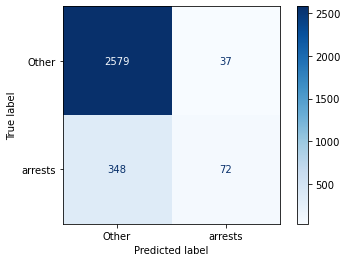

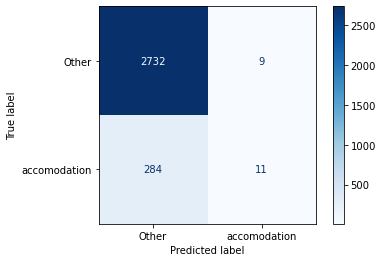

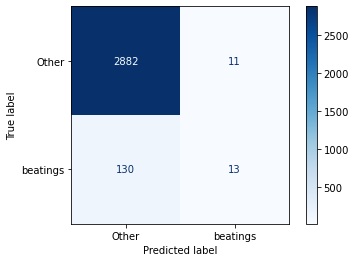

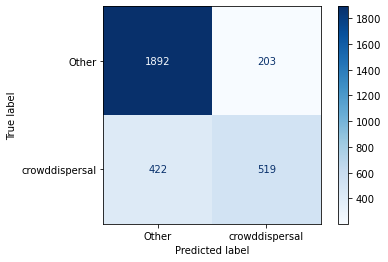

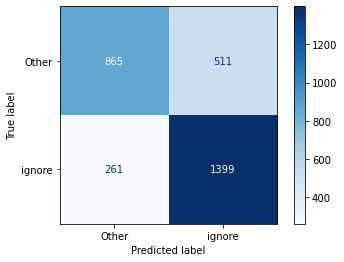

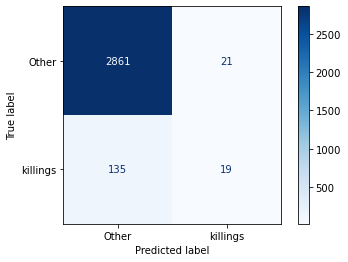

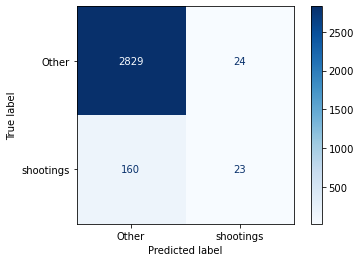

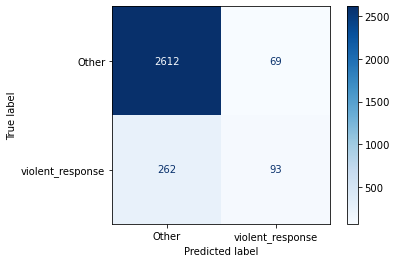

In [49]:
model_performance_dict_nc = {
    'target':[],
    'majority_class':[],
    'majority_percent':[],
    'f1_score_train':[],
    'f1_score_test':[],
    'precision_train':[],
    'precision_test':[],
    'recall_train':[],
    'recall_test':[] 
}

 
targets = ['arrests','accomodation','beatings','crowddispersal','ignore','killings','shootings', 'violent_response']    
    
for target in targets:
    
    predicted_column, probability_column, f1_score_train, f1_score_test, \
    precision_train, precision_test, recall_train, recall_test, cf_matrix = state_response_predictor(mass_no_country, 
                                                                                                     features, 
                                                                                                     target, 
                                                                                                     LogisticRegression_1)
    
    model_performance_dict_nc['target'].append(target)
    model_performance_dict_nc['majority_class'].append(mass[target].value_counts(normalize=True).idxmax())
    model_performance_dict_nc['majority_percent'].append(max(mass[target].value_counts(normalize=True)))
    model_performance_dict_nc['f1_score_train'].append(f1_score_train)
    model_performance_dict_nc['f1_score_test'].append(f1_score_test)
    model_performance_dict_nc['precision_train'].append(precision_train)
    model_performance_dict_nc['precision_test'].append(precision_test)
    model_performance_dict_nc['recall_train'].append(recall_train)
    model_performance_dict_nc['recall_test'].append(recall_test)
    
print(model_performance_dict)
    
model_performance_df_nc = pd.DataFrame(model_performance_dict_nc)
# model_performance_df_nc.round(4)

### Includes country rows 

In [50]:
model_performance_df.round(4)

,target,majority_class,majority_percent,f1_score_train,f1_score_test,precision_train,precision_test,recall_train,recall_test
0,arrests,0,0.8588,0.2443,0.2722,0.5690,0.6606,0.1555,0.1714
1,accomodation,0,0.8998,0.0994,0.0698,0.6471,0.5500,0.0538,0.0373
2,beatings,0,0.9473,0.1717,0.1557,0.6500,0.5417,0.0989,0.0909
3,crowddispersal,0,0.6865,0.6446,0.6242,0.7300,0.7188,0.5772,0.5515
4,ignore,1,0.5434,0.7954,0.7838,0.7458,0.7325,0.8520,0.8428
5,killings,0,0.9457,0.2419,0.1959,0.6121,0.4750,0.1507,0.1234
6,shootings,0,0.9387,0.2409,0.2000,0.5947,0.4894,0.1511,0.1257
7,violent_response,0,0.8754,0.3980,0.3598,0.6430,0.5741,0.2882,0.2620


### Does not include country rows (all countries dropped) 

In [51]:
model_performance_df_nc.round(4)

,target,majority_class,majority_percent,f1_score_train,f1_score_test,precision_train,precision_test,recall_train,recall_test
0,arrests,0,0.8588,0.2443,0.2722,0.5690,0.6606,0.1555,0.1714
1,accomodation,0,0.8998,0.0994,0.0698,0.6471,0.5500,0.0538,0.0373
2,beatings,0,0.9473,0.1717,0.1557,0.6500,0.5417,0.0989,0.0909
3,crowddispersal,0,0.6865,0.6446,0.6242,0.7300,0.7188,0.5772,0.5515
4,ignore,1,0.5434,0.7954,0.7838,0.7458,0.7325,0.8520,0.8428
5,killings,0,0.9457,0.2419,0.1959,0.6121,0.4750,0.1507,0.1234
6,shootings,0,0.9387,0.2409,0.2000,0.5947,0.4894,0.1511,0.1257
7,violent_response,0,0.8754,0.3980,0.3598,0.6430,0.5741,0.2882,0.2620


In [52]:
# mass_no_country.columns

_Dropping all prediction columns from `mass_no_country` so that I can pickle it and use it in another notebook._

In [53]:
mass_no_country.drop(columns=['arrests_predicted', 'arrests_probability', 'accomodation_predicted',
       'accomodation_probability', 'beatings_predicted',
       'beatings_probability', 'crowddispersal_predicted',
       'crowddispersal_probability', 'ignore_predicted', 'ignore_probability',
       'killings_predicted', 'killings_probability', 'shootings_predicted',
       'shootings_probability', 'violence_predicted', 'violence_probability'], inplace=True)

_Saving `mass_no_country` as CSV and pickle_

In [265]:
pwd

'/Users/emilynaftalin/Data_Science/General Assembly/dsi/projects/Mass-Protests/users'

In [267]:
# mass_no_country.to_csv('../data/03_mass_no_country.csv', index=False)

In [54]:
# mass_no_country.to_pickle('../data/mass_no_country.pickle')

#### _Now re-running `state_response_predictor` with the confusion matrices:_

In [55]:
# mass_no_country['arrested_predicted'], mass_no_country['arrested_probability'], \
# f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test, cf_matrix = \
# state_response_predictor(mass_no_country, features, 'arrests', LogisticRegression_1)

### Building Spider/Radar Chart 

In [56]:
model_performance_df_nc.T

,0,1,2,3,4,5,6,7
target,arrests,accomodation,beatings,crowddispersal,ignore,killings,shootings,violent_response
majority_class,0,0,0,0,1,0,0,0
majority_percent,0.858818,0.899796,0.947296,0.686541,0.543448,0.945714,0.938665,0.875354
f1_score_train,0.244303,0.0993976,0.171731,0.644623,0.795409,0.241916,0.240938,0.398023
f1_score_test,0.272212,0.0698413,0.155689,0.624173,0.783754,0.195876,0.2,0.359768
precision_train,0.569002,0.647059,0.65,0.729954,0.745848,0.612121,0.594737,0.642961
precision_test,0.66055,0.55,0.541667,0.718837,0.732461,0.475,0.489362,0.574074
recall_train,0.155543,0.0538336,0.0989346,0.577155,0.852026,0.150746,0.15107,0.288224
recall_test,0.171429,0.0372881,0.0909091,0.551541,0.842771,0.123377,0.125683,0.261972


In [57]:
model_performance_df_nc

,target,majority_class,majority_percent,f1_score_train,f1_score_test,precision_train,precision_test,recall_train,recall_test
0,arrests,0,0.858818,0.244303,0.272212,0.569002,0.660550,0.155543,0.171429
1,accomodation,0,0.899796,0.099398,0.069841,0.647059,0.550000,0.053834,0.037288
2,beatings,0,0.947296,0.171731,0.155689,0.650000,0.541667,0.098935,0.090909
3,crowddispersal,0,0.686541,0.644623,0.624173,0.729954,0.718837,0.577155,0.551541
4,ignore,1,0.543448,0.795409,0.783754,0.745848,0.732461,0.852026,0.842771
5,killings,0,0.945714,0.241916,0.195876,0.612121,0.475000,0.150746,0.123377
6,shootings,0,0.938665,0.240938,0.200000,0.594737,0.489362,0.151070,0.125683
7,violent_response,0,0.875354,0.398023,0.359768,0.642961,0.574074,0.288224,0.261972


In [58]:
# creating new dataframe called performance that drops value_count columns from model_performance_df_nc
performance = model_performance_df_nc.copy()

In [59]:
performance.drop(columns=['majority_class', 'majority_percent'], inplace=True)
performance

,target,f1_score_train,f1_score_test,precision_train,precision_test,recall_train,recall_test
0,arrests,0.244303,0.272212,0.569002,0.660550,0.155543,0.171429
1,accomodation,0.099398,0.069841,0.647059,0.550000,0.053834,0.037288
2,beatings,0.171731,0.155689,0.650000,0.541667,0.098935,0.090909
3,crowddispersal,0.644623,0.624173,0.729954,0.718837,0.577155,0.551541
4,ignore,0.795409,0.783754,0.745848,0.732461,0.852026,0.842771
5,killings,0.241916,0.195876,0.612121,0.475000,0.150746,0.123377
6,shootings,0.240938,0.200000,0.594737,0.489362,0.151070,0.125683
7,violent_response,0.398023,0.359768,0.642961,0.574074,0.288224,0.261972


In [276]:
# using example from https://python-graph-gallery.com/392-use-faceting-for-radar-chart/

# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})

In [279]:
df

,group,var1,var2,var3,var4,var5
0,A,38.0,29,8,7,28
1,B,1.5,10,39,31,15
2,C,30.0,9,23,33,32
3,D,4.0,34,24,14,14


In [331]:
def make_spider( row, title, color):
    
    # number of variable 
    categories = list(df)[1:]
    N = len(categories)
    
    # What will be the angle for each axis in the plot? 
    angles = [ n / float(N) * 2 * pi for n in range(N) ]
    angles += angles[:1]
    
    # Initialize the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Setup ylabels 
#     ax.set_rlabel_position(0)
#     plt.yticks( [0.2,0.4,0.6,0.8], ['0.2','0.4','0.6','0.8'], color="grey", size=7 )
#     plt.ylim(0,1)

    # Setup xlabels
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    
    # Setup ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.ylim(0,40)

    
    # ind1
    values = df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    # Add title
    plt.title(title, size=11, color=color, y=1.1)

In [332]:
list(df)[1:]

['var1', 'var2', 'var3', 'var4', 'var5']

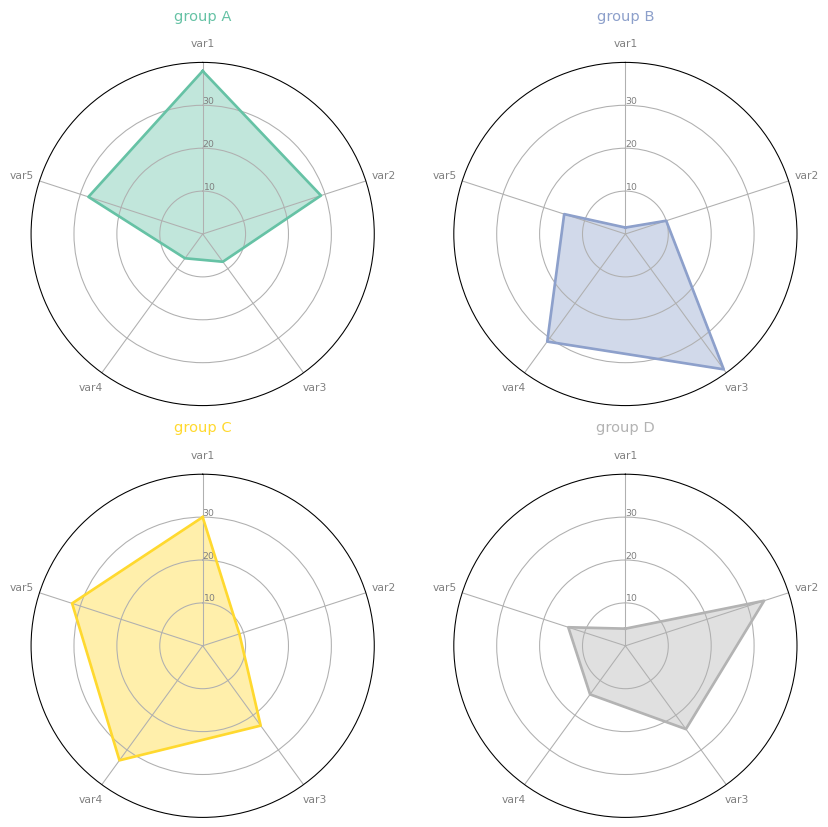

In [333]:
## apply to all! 

# initialize figure 
my_dpi = 96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

# Create a color palette: 
my_palette = plt.cm.get_cmap("Set2", len(df.index))

# Loop through!
for row in range(0, len(df.index)):
    make_spider( row=row, title='group ' + df['group'][row], color=my_palette(row) )

In [357]:
def make_spider( row, title, color):
    
    # number of variable 
    categories = list(performance)[1:]
    N = len(categories)
    
    # What will be the angle for each axis in the plot? 
    angles = [ n / float(N) * 2 * pi for n in range(N) ]
    angles += angles[:1]
    
    # Initialize the spider plot
    ax = plt.subplot(4,2,row+1, polar=True, )
#     ax = plt.subplot(4,4, polar=True, )

    
#     # If you want the first axis to be on top:
#     ax.set_theta_offset(pi / 2)
#     ax.set_theta_direction(-1)

    # Setup xlabels
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Setup ylabels 
    ax.set_rlabel_position(0)
    plt.yticks( [0.2,0.4,0.6,0.8], ['0.2','0.4','0.6','0.8'], color="grey", size=7 )
    plt.ylim(0,1)
    
#     # Setup ylabels
#     ax.set_rlabel_position(0)
#     plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
#     plt.ylim(0,40)

    
    # ind1
    values = performance.loc[row].drop('target').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    # Add title
    plt.title(title, size=11, color=color, y=1.1)

In [367]:
import plotly.express as px

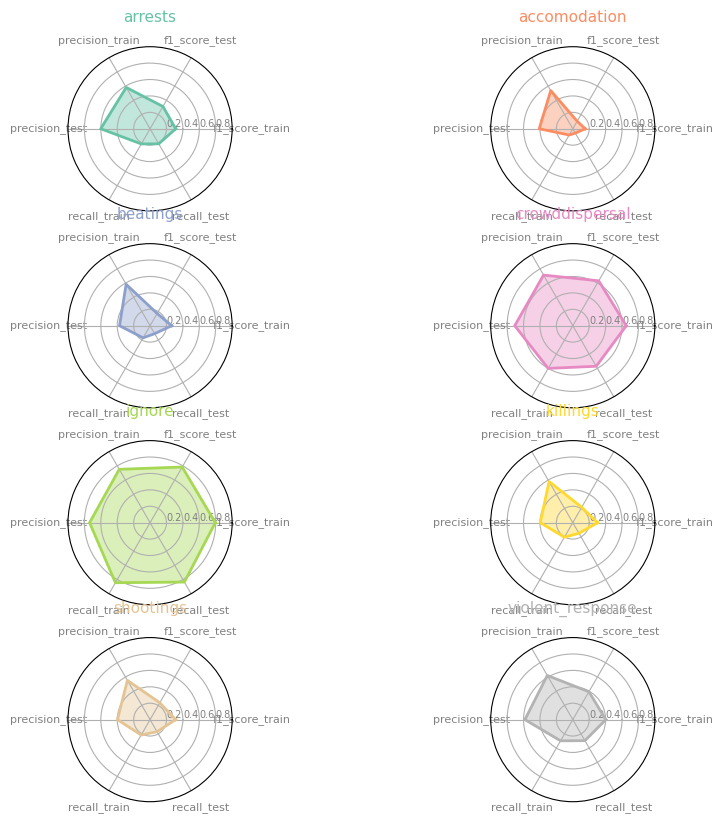

In [368]:
## apply to all! 

# initialize figure 

# my_dpi = 100
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

# plt.figure(figsize=(80,80))

# Create a color palette: 
my_palette = plt.cm.get_cmap("Set2", len(performance.index))

# Loop through!
for row in range(0, len(performance.index)):
    make_spider( row=row, title=performance['target'][row], color=my_palette(row) )

In [369]:
df_new = pd.DataFrame(dict(
    r=[1, 5, 2, 2, 3],
    theta=['processing cost','mechanical properties','chemical stability',
           'thermal stability', 'device integration']))

In [370]:
df_new

,r,theta
0,1,processing cost
1,5,mechanical properties
2,2,chemical stability
3,2,thermal stability
4,3,device integration


In [371]:
performance

,target,f1_score_train,f1_score_test,precision_train,precision_test,recall_train,recall_test
0,arrests,0.312394,0.313380,0.581359,0.601351,0.213581,0.211905
1,accomodation,0.151367,0.106195,0.537313,0.409091,0.088091,0.061017
2,beatings,0.263840,0.172043,0.583333,0.372093,0.170472,0.111888
3,crowddispersal,0.651500,0.631765,0.712376,0.707510,0.600210,0.570670
4,ignore,0.795143,0.783173,0.751046,0.736982,0.844741,0.835542
5,killings,0.302095,0.216981,0.578059,0.396552,0.204478,0.149351
6,shootings,0.311239,0.237548,0.552901,0.397436,0.216578,0.169399
7,violent_response,0.402814,0.392523,0.621438,0.583333,0.297983,0.295775


In [60]:
# categories = list(performance)[1:]
# N = len(categories)

# # What will be the angle for each axis in the plot? 
# angles = [ n / float(N) * 2 * pi for n in range(N) ]
# angles += angles[:1]

# # Initialize the spider plot
# ax = plt.subplot(4,2,row+1, polar=True, )
# #     ax = plt.subplot(4,4, polar=True, )


# #     # If you want the first axis to be on top:
# #     ax.set_theta_offset(pi / 2)
# #     ax.set_theta_direction(-1)

# # Setup xlabels
# plt.xticks(angles[:-1], categories, color='grey', size=8)
# fig = px.line_polar(performance, r='target', theta='f1_score_train', line_close=True)
# fig.update_traces(fill='toself')
# fig.show()

In [61]:
performance

,target,f1_score_train,f1_score_test,precision_train,precision_test,recall_train,recall_test
0,arrests,0.244303,0.272212,0.569002,0.660550,0.155543,0.171429
1,accomodation,0.099398,0.069841,0.647059,0.550000,0.053834,0.037288
2,beatings,0.171731,0.155689,0.650000,0.541667,0.098935,0.090909
3,crowddispersal,0.644623,0.624173,0.729954,0.718837,0.577155,0.551541
4,ignore,0.795409,0.783754,0.745848,0.732461,0.852026,0.842771
5,killings,0.241916,0.195876,0.612121,0.475000,0.150746,0.123377
6,shootings,0.240938,0.200000,0.594737,0.489362,0.151070,0.125683
7,violent_response,0.398023,0.359768,0.642961,0.574074,0.288224,0.261972


In [63]:
categories

['f1_score_train',
 'f1_score_test',
 'precision_train',
 'precision_test',
 'recall_train',
 'recall_test']

In [67]:
from math import pi 

In [69]:
categories = list(performance)[1:]  # value for each cateogory 
N = len(categories)  # number of categories

# # repeat first value to close the circle 
# categories += categories[:1]

values = performance.loc[row].drop('target').values.flatten().tolist()
values += values[:1]

# calculate angle for each category 
angles = [n / float(N) * 2 * pi for n in range(N)]
# repeat first value to close the circle 
angles += angles[:1]

#plot 
plt.polar(angles, categories)

NameError: name 'row' is not defined